<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

1. Determine the industry factors that are most important in  predicting the salary amounts for these data.
2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you focus on data-related job postings, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by limiting your search to a single region.

Hint: Aggregators like Indeed.com regularly pool job postings from a variety of markets and industries.

#### Goal: 
Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

### Directions
In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

## QUESTION 1: Factors that impact salary
To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:

    .NLP
    .Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
    .Ensemble methods and decision tree models
    .SVM models
Whatever you decide to use, the most important thing is to justify your choices and interpret your results. Communication of your process is key. Note that most listings DO NOT come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.

# 1. Load the data, cleaning and EDA 

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from nltk.stem.snowball import SnowballStemmer

%matplotlib inline


In [209]:
df = pd.read_csv('./data_science.csv')
df.head(-10)

,Unnamed: 0,title,job_teaser,advertiser,work_type,classification,location,job_description,estimated_salary,above_ave_salary
0,2,Big Data Engineer - Machine Learning,Are you ready to use machine learning in one o...,Morgan McKinley,Full Time,Science & Technology,Sydney,Due to fantastic growth this organisation are ...,55000.0,0
1,4,SSIS/Data Engineer,Randstad has partnered with an industry leadin...,Randstad Technologies,Full Time,Information & Communication Technology,Melbourne,Randstad has partnered with an industry leadin...,55000.0,0
2,5,Data Warehouse Engineer - Analytics,"A great opportunity to build and have impact, ...",Robert Walters,Full Time,Information & Communication Technology,Sydney,We are currently hiring for a newly created po...,55000.0,0
3,8,PhD Scholarship ARC Training Centre in Surface...,Swinburne’s ARC Training Centre will be the fi...,Swinburne University of Technology,Full Time,Education & Training,Melbourne,About the CentreSwinburne’s ARC Training Centr...,55000.0,0
4,24,Vacation Student - Discovery,"Evolution Mining is a leading, growth focused ...",Evolution Mining,Full Time,"Mining, Resources & Energy",Wagga Wagga & Riverina,"Evolution Mining is a leading, growth focused ...",55000.0,0
...,...,...,...,...,...,...,...,...,...,...
1365,447,General Practitioner | Redland Bay | $15K+ per...,Ensure the local community in Redland Bay have...,Healthcare Professionals Group,Full Time,Healthcare & Medical,Brisbane,Benefits:Departing GP grossing $15K-$20K per w...,155000.0,1
1366,449,Environmental Engineer - Contaminated Land,Join a high performing team on a range of proj...,Aspect Personnel,Full Time,Engineering,Melbourne,The CompanyThis fast growing environmental con...,155000.0,1
1367,450,Senior Software Engineer - Python,Come add your skills to Domain and experience ...,Domain Group,Full Time,Information & Communication Technology,Sydney,A little about us… As one of Australia's gre...,155000.0,1
1368,452,Environmental Compliance and Systems Specialis...,We have a short term requirement for an Enviro...,Sandfire Resources NL,Full Time,"Mining, Resources & Energy",Perth,Who we are Sandfire is a leading Australian co...,155000.0,1


In [210]:
# check the data
df.shape

(1380, 10)

In [211]:
df.columns

Index(['Unnamed: 0', 'title', 'job_teaser', 'advertiser', 'work_type',
       'classification', 'location', 'job_description', 'estimated_salary',
       'above_ave_salary'],
      dtype='object')

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 10 columns):
Unnamed: 0          1380 non-null int64
title               1380 non-null object
job_teaser          1380 non-null object
advertiser          1380 non-null object
work_type           1380 non-null object
classification      1380 non-null object
location            1380 non-null object
job_description     1380 non-null object
estimated_salary    1380 non-null float64
above_ave_salary    1380 non-null int64
dtypes: float64(1), int64(2), object(7)
memory usage: 107.9+ KB


In [213]:
# drop unnamed: 0 columns

df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [214]:
# the title column, cahnge lower case and filter those data related jobs only
df['title'] = df['title'].str.lower()

In [215]:
df['title'].value_counts(ascending=False).head(30)

data engineer                              30
data scientist                             25
data analyst                               16
software engineer                           7
senior data engineer                        6
senior data scientist                       5
data architect                              5
machine learning engineer                   4
senior data analyst                         4
lead data engineer                          4
research assistant                          4
full stack developer                        4
senior software engineer                    4
big data engineer                           3
operations data scientist                   3
admin assistant - general                   3
global demand planner - medical devices     3
environmental scientist                     3
aws data engineer                           3
postdoctoral research fellow                3
territory manager                           3
project officer                   

In [216]:
# check the unique value of title columns
df['title'].nunique()

1203

In [217]:
# the data related jobs like data scientist, data analyst, research scientist, business intelligence
df_data = df[df.title.str.contains('data|technology|engineer|analyst|scientist|business|intelligence|research|software|account|consultant|developer')]

In [218]:
df_data.shape

(885, 9)

In [219]:
# check the null value in column 
df_data.isnull().sum()

title               0
job_teaser          0
advertiser          0
work_type           0
classification      0
location            0
job_description     0
estimated_salary    0
above_ave_salary    0
dtype: int64

In [220]:
df_data.estimated_salary.unique()

array([ 55000.,  65000.,  75000.,  90000., 110000., 135000., 155000.])

In [221]:
df_data.estimated_salary.value_counts()

135000.0    248
110000.0    203
155000.0    165
90000.0     148
75000.0      64
65000.0      33
55000.0      24
Name: estimated_salary, dtype: int64

In [222]:
#the avarage salary equeal to mean of estimated_salary
ave_salary = df_data.estimated_salary.mean()
ave_salary

116350.28248587571

In [223]:
df_data['above_ave_salary'].value_counts()

0    472
1    413
Name: above_ave_salary, dtype: int64

In [224]:
#describe the salary
df_data.describe()

,estimated_salary,above_ave_salary
count,885.000000,885.000000
mean,116350.282486,0.466667
std,28745.674718,0.499170
min,55000.000000,0.000000
25%,90000.000000,0.000000
50%,110000.000000,0.000000
75%,135000.000000,1.000000
max,155000.000000,1.000000


### The estimated_salary

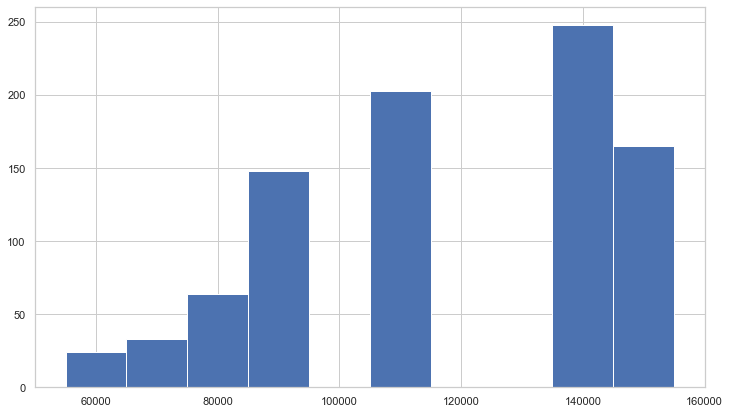

In [225]:
fig = plt.figure(figsize=(12, 7))
ax = fig.gca()
plt.hist(df_data.estimated_salary, color=None)
plt.show()

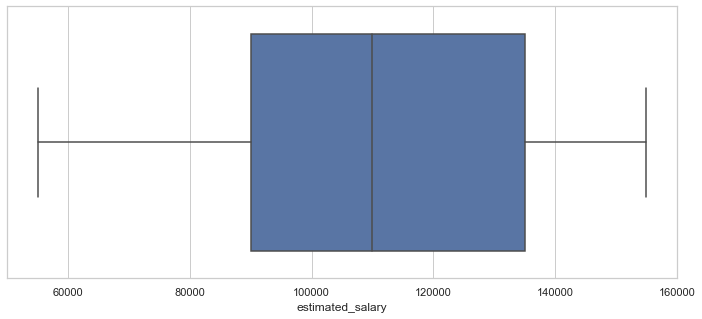

In [226]:
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

sns.set(style="whitegrid")
ax = sns.boxplot(x=df_data["estimated_salary"])

The mean for estimated_salary is 116350.28248587571
The median for estimated_salary is 110000.0


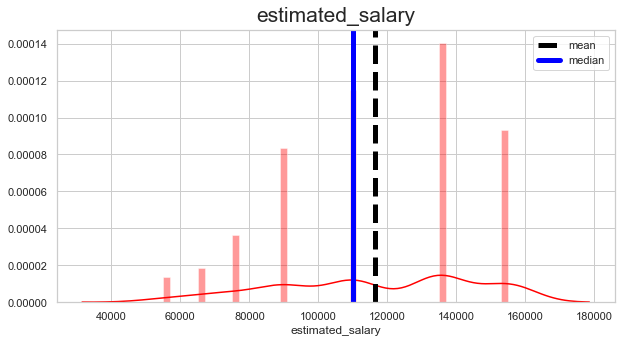

In [227]:
#Distribution of saleprice
fig = plt.figure(figsize=(10,5))


ax = fig.gca()

ax.set_title('estimated_salary', fontsize=21, y=1.01)

sns.distplot(df_data['estimated_salary'], bins=50, color='red', ax=ax)

mean=ax.axvline(df_data['estimated_salary'].mean(), color='black', linestyle='--', lw=5)
median=ax.axvline(df_data['estimated_salary'].median(), color='blue', linestyle='-', lw=5)

plt.legend(['mean', 'median'])


print('The mean for estimated_salary is', df_data['estimated_salary'].mean())
print('The median for estimated_salary is', df_data['estimated_salary'].median())

In [228]:
df_data.head()

,title,job_teaser,advertiser,work_type,classification,location,job_description,estimated_salary,above_ave_salary
0,big data engineer - machine learning,Are you ready to use machine learning in one o...,Morgan McKinley,Full Time,Science & Technology,Sydney,Due to fantastic growth this organisation are ...,55000.0,0
1,ssis/data engineer,Randstad has partnered with an industry leadin...,Randstad Technologies,Full Time,Information & Communication Technology,Melbourne,Randstad has partnered with an industry leadin...,55000.0,0
2,data warehouse engineer - analytics,"A great opportunity to build and have impact, ...",Robert Walters,Full Time,Information & Communication Technology,Sydney,We are currently hiring for a newly created po...,55000.0,0
3,phd scholarship arc training centre in surface...,Swinburne’s ARC Training Centre will be the fi...,Swinburne University of Technology,Full Time,Education & Training,Melbourne,About the CentreSwinburne’s ARC Training Centr...,55000.0,0
9,research laboratory technician,Research Laboratory Technician • Centre for Ex...,Centre for Digestive Diseases,Full Time,Healthcare & Medical,Sydney,Laboratory Technician Outstanding opportunity ...,55000.0,0


### Title

In [229]:
# the job title
df_data['title'].value_counts()

data engineer                          30
data scientist                         25
data analyst                           16
software engineer                       7
senior data engineer                    6
                                       ..
mid-snr python developer                1
data integration / migration expert     1
data warehouse consultant               1
trading infrastructure engineer         1
full stack software engineer            1
Name: title, Length: 734, dtype: int64

### Work_type

In [230]:
df_data['work_type'].value_counts()

Full Time    885
Name: work_type, dtype: int64

In [231]:
#the all work type is Full Time, I'm not consider the work type for this analysis

### Classification

In [232]:
df_data['classification'].unique()

array(['Science & Technology', 'Information & Communication Technology',
       'Education & Training', 'Healthcare & Medical',
       'Marketing & Communications', 'Consulting & Strategy',
       'Banking & Financial Services', 'Engineering', 'Trades & Services',
       'Government & Defence', 'Farming, Animals & Conservation',
       'Hospitality & Tourism', 'Accounting',
       'Insurance & Superannuation', 'Human Resources & Recruitment',
       'Community Services & Development',
       'Manufacturing, Transport & Logistics',
       'Mining, Resources & Energy', 'Advertising, Arts & Media', 'Sales',
       'CEO & General Management', 'Construction', 'Legal',
       'Design & Architecture'], dtype=object)

In [233]:
df_data['classification']=df_data['classification'].str.split(',').str[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [234]:
df_data['classification'].unique()

array(['Science & Technology', 'Information & Communication Technology',
       'Education & Training', 'Healthcare & Medical',
       'Marketing & Communications', 'Consulting & Strategy',
       'Banking & Financial Services', 'Engineering', 'Trades & Services',
       'Government & Defence', 'Farming', 'Hospitality & Tourism',
       'Accounting', 'Insurance & Superannuation',
       'Human Resources & Recruitment',
       'Community Services & Development', 'Manufacturing', 'Mining',
       'Advertising', 'Sales', 'CEO & General Management', 'Construction',
       'Legal', 'Design & Architecture'], dtype=object)

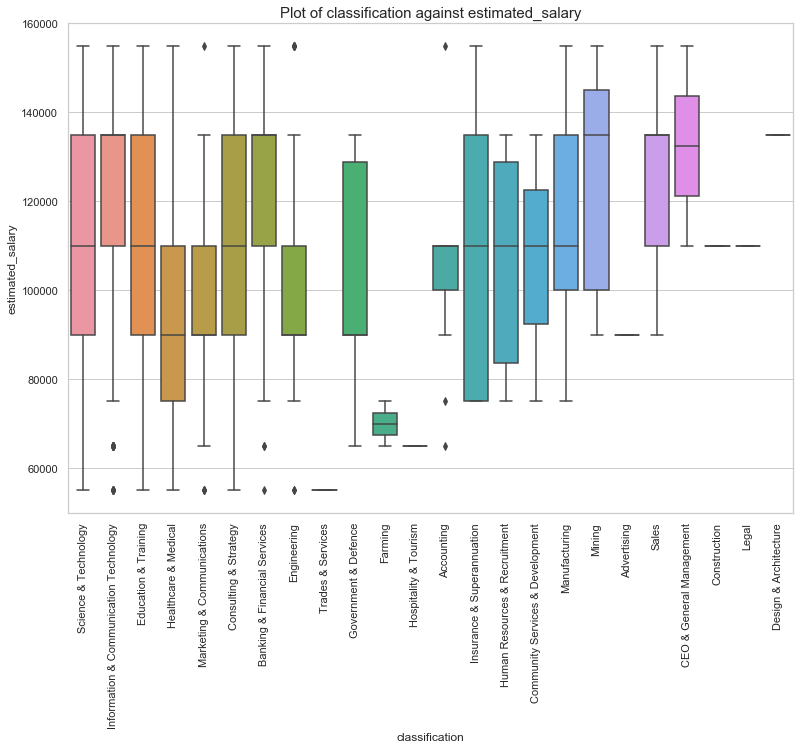

In [235]:

plt.figure(figsize=(13,9))
plt.xticks(rotation = 90)
plt.title('Plot of classification against estimated_salary', fontsize = 15)
sns.boxplot(df_data['classification'], df_data['estimated_salary'])

### Location

In [236]:
df_data['location'].unique()

array(['Sydney', 'Melbourne', 'Perth', 'Newcastle, Maitland & Hunter',
       'Brisbane', 'ACT', 'Wagga Wagga & Riverina', 'Mildura & Murray',
       'Adelaide', 'Mackay & Coalfields', 'Ballarat & Central Highlands',
       'Northern QLD', 'Gosford & Central Coast',
       'Far West & North Central NSW', 'Northam & Wheatbelt', 'Hobart',
       'South West Coast VIC', 'Albury Area', 'Gold Coast',
       'Cairns & Far North', 'Bendigo, Goldfields & Macedon Ranges',
       'Wollongong, Illawarra & South Coast', 'Sunshine Coast',
       'Bunbury & South West', 'Kalgoorlie, Goldfields & Esperance',
       'Asia Pacific', 'Western QLD'], dtype=object)

In [237]:
df_data['location']=df_data['location'].str.split(',').str[0]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [238]:
df_data['location'].unique()

array(['Sydney', 'Melbourne', 'Perth', 'Newcastle', 'Brisbane', 'ACT',
       'Wagga Wagga & Riverina', 'Mildura & Murray', 'Adelaide',
       'Mackay & Coalfields', 'Ballarat & Central Highlands',
       'Northern QLD', 'Gosford & Central Coast',
       'Far West & North Central NSW', 'Northam & Wheatbelt', 'Hobart',
       'South West Coast VIC', 'Albury Area', 'Gold Coast',
       'Cairns & Far North', 'Bendigo', 'Wollongong', 'Sunshine Coast',
       'Bunbury & South West', 'Kalgoorlie', 'Asia Pacific',
       'Western QLD'], dtype=object)

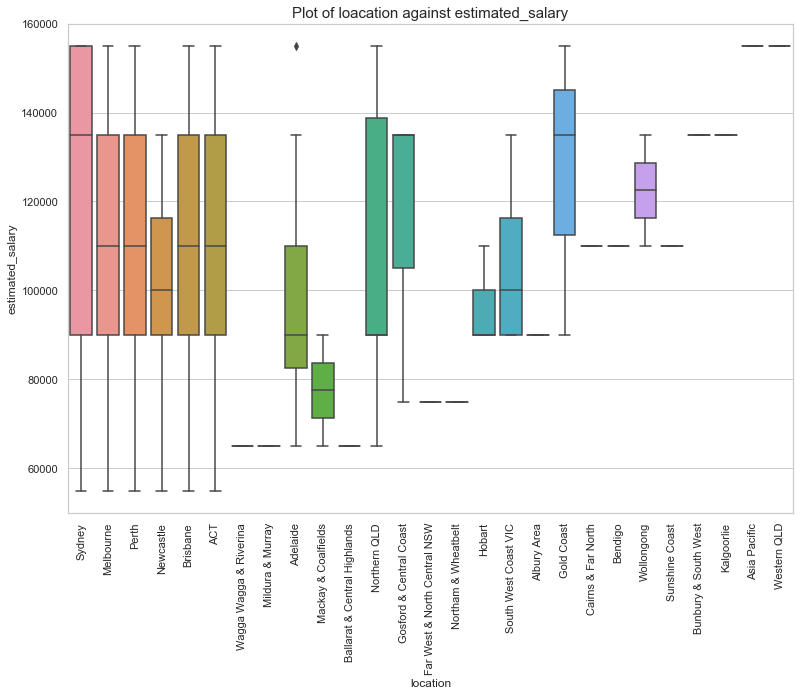

In [239]:
plt.figure(figsize=(13,9))
plt.xticks(rotation = 90)
plt.title('Plot of loacation against estimated_salary', fontsize = 15)
sns.boxplot(df_data['location'], df_data['estimated_salary'])

# 2. Train a model

In [240]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegressionCV, LassoCV, Lasso, LinearRegression, RidgeCV, Ridge, ElasticNetCV, ElasticNet, BayesianRidge, OrthogonalMatchingPursuit
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import StratifiedKFold
import sklearn.linear_model as linear_model
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error

Regression Model I build a regression modle based on these 3 variable: 'title','classification', 'location' to predict the estimated salary. 

In [241]:
#define X and y
#y is a real value, which can be an integer or a floating point value

X = df_data[['title','classification', 'location']]
y = df_data['estimated_salary']

In [1]:

X_dummy = pd.get_dummies(X, drop_first=True)
X_dummy.shape


NameError: name 'pd' is not defined

In [2]:
#we frame this as a regression problem first to predict the average_salary
#spilt to train test split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.3, random_state=42)

NameError: name 'train_test_split' is not defined

### The Ridge

In [244]:
####ridge regression

ridge_alphas = np.logspace(-2, 7, 50)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=12)
optimal_ridge.fit(X_train, y_train)
print("best alpha parameter:", optimal_ridge.alpha_)
ridge = Ridge(alpha=optimal_ridge.alpha_)
ridge_scores = cross_val_score(ridge, X_train, y_train, cv=10)


ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
test_score=ridge.score(X_test, y_test)
residuals = abs(y_test-y_pred)

print("Cross-validated scores:", ridge_scores)
print("Mean Cross-validated train scores:", np.mean(ridge_scores))
print("Std Cross-validated train scores:", np.std(ridge_scores))
print("Mean Cross-validated test scores:", np.mean(test_score))
print("Mean residuals:", residuals.mean())

best alpha parameter: 0.6866488450043002
Cross-validated scores: [ 0.27268724  0.1218875   0.09384625  0.17952168  0.13614719  0.07255924
  0.16475205  0.20796168  0.06129887 -0.1497339 ]
Mean Cross-validated train scores: 0.11609278029176535
Std Cross-validated train scores: 0.10763117521924609
Mean Cross-validated test scores: 0.08739663430428002
Mean residuals: 21153.389785978998


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


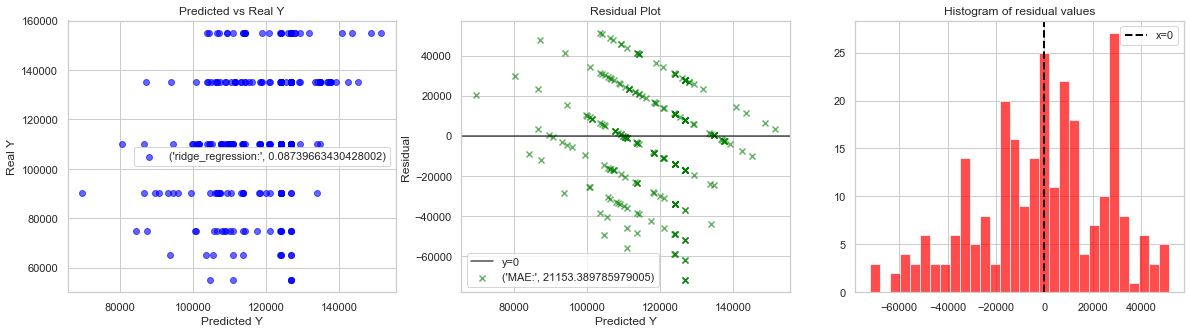

In [245]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(y_pred, y_test, color='blue', alpha=0.6, label=("ridge_regression:", test_score))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(y_pred, y_test-y_pred, color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, y_pred)))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - y_pred, bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [246]:
#check the coefficients for variables in the ridge

ridge_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':ridge.coef_,
                            'abs_coef':np.abs(ridge.coef_)})

ridge_coefs.sort_values('abs_coef', inplace=True, ascending=False)
ridge_coefs.head(20)

,variable,coef,abs_coef
349,title_junior application developer,-42655.247840,42655.247840
385,title_level 2/3 technical engineer,-42655.247840,42655.247840
352,title_junior data analyst,-42390.671641,42390.671641
294,title_functional business analyst,-41024.038374,41024.038374
691,title_ssis/data engineer,-41024.038374,41024.038374
34,title_associate professor/senior research fell...,37984.960820,37984.960820
299,title_graduate / junior developer,-37586.346752,37586.346752
315,title_graduate web developer and analyst,-36726.331439,36726.331439
64,title_bureau data quality analyst,-36726.331439,36726.331439
23,title_analytics engineers - industrial experie...,36682.645568,36682.645568


### The Lasso

In [247]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print("best alpha parameter:", optimal_lasso.alpha_)
lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso_scores = cross_val_score(lasso, X_train, y_train, cv=10)

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
test_score = lasso.score(X_test, y_test)
residuals = abs(y_test-y_pred)
print("Cross-validated scores:", lasso_scores)
print("Mean Cross-validated train scores:", np.mean(lasso_scores))
print("Std Cross-validated train scores:", np.std(lasso_scores))
print("Mean Cross-validated test scores:", np.mean(test_score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

best alpha parameter: 25.65948210783062
Cross-validated scores: [ 0.27336651  0.04843855  0.09309456  0.14284288  0.13459478  0.05191446
  0.22183643  0.15530212 -0.02770781 -0.23304205]
Mean Cross-validated train scores: 0.08606404346493328
Std Cross-validated train scores: 0.1346452247881297
Mean Cross-validated test scores: 0.02344390268531371


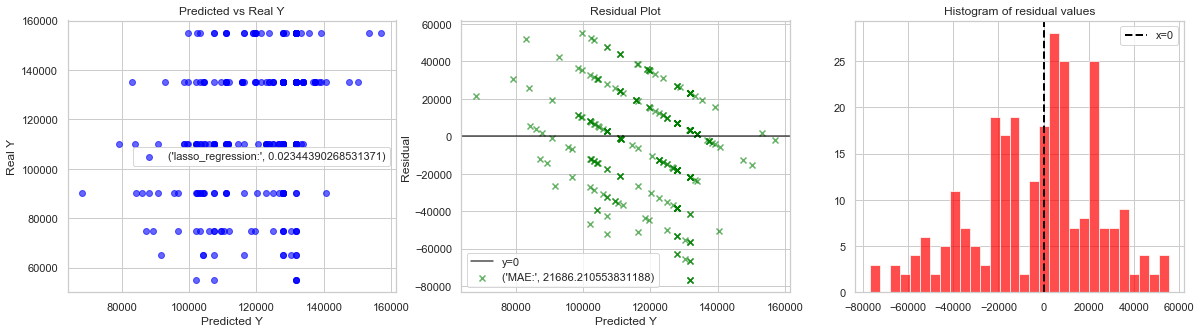

In [248]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Get the current axis out of the figure.
ax = fig.gca()
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]


# Predicted vs Real y
ax1.scatter(y_pred, y_test, color='blue', alpha=0.6, label=("lasso_regression:", test_score))
ax1.set_xlabel('Predicted Y')
ax1.set_ylabel('Real Y')
ax1.legend(loc='best')
ax1.set_title('Predicted vs Real Y')

ax2.scatter(y_pred, y_test-y_pred, color='green', marker='x', alpha=0.6, label=("MAE:", mean_absolute_error(y_test, y_pred)))
ax2.set_xlabel('Predicted Y')
ax2.set_ylabel('Residual')
ax2.axhline(y=0, color='black', alpha=0.7, label='y=0')
ax2.legend(loc='best')
ax2.set_title('Residual Plot')

ax3.hist(y_test - y_pred, bins=30, color='red', alpha=0.7)
ax3.set_title('Histogram of residual values')
ax3.axvline(x=0, color='black', linestyle='--', lw=2, label='x=0')
ax3.legend(loc='best')

In [249]:

#check the coefficients for variables in the lasso
lasso.fit(X_train, y_train)
lasso_coefs = pd.DataFrame({'variable':X_train.columns,
                            'coef':lasso.coef_,
                            'abs_coef':np.abs(lasso.coef_)})

lasso_coefs.sort_values('abs_coef', inplace=True, ascending=False)

print('Percent variables zeroed out:', (np.sum((lasso.coef_ == 0))/float(len(lasso.coef_)))*100,"%")
lasso_coefs.head(20)


Percent variables zeroed out: 55.24296675191815 %


,variable,coef,abs_coef
385,title_level 2/3 technical engineer,-60784.720398,60784.720398
349,title_junior application developer,-60784.719899,60784.719899
691,title_ssis/data engineer,-57126.227923,57126.227923
294,title_functional business analyst,-57126.226444,57126.226444
352,title_junior data analyst,-53726.329602,53726.329602
34,title_associate professor/senior research fell...,52219.982416,52219.982416
299,title_graduate / junior developer,-51815.343039,51815.343039
23,title_analytics engineers - industrial experie...,51137.109472,51137.109472
315,title_graduate web developer and analyst,-50784.719700,50784.719700
64,title_bureau data quality analyst,-50784.717801,50784.717801


### The Ridge and Lasso Scores

In [250]:
ridge_columns = ridge_coefs.variable.values
lasso_columns = lasso_coefs.variable.values

In [251]:
def score_ridge(X_test):
    scores_ridge = cross_val_score(ridge, X_test, y_test, cv=9)
    return scores_ridge.mean(), scores_ridge.std()

def score_lasso(X_test_ss):
    scores_lasso = cross_val_score(lasso, X_test_ss, y_test, cv=9)
    return scores_lasso.mean(), scores_lasso.std()


In [252]:
all_scores_test = [
    score_ridge(X_test[ridge_columns]),
    score_lasso(X_test[lasso_columns])
    ]

# Putting results into a DataFrame.
all_scores = pd.DataFrame(all_scores_test, columns=['test_mean_score', 'test_std_score'], index = ['ridge_model', 'lasso_model'])

all_scores

,test_mean_score,test_std_score
ridge_model,0.092427,0.086914
lasso_model,0.039605,0.168630


In [253]:
# the accuracy score

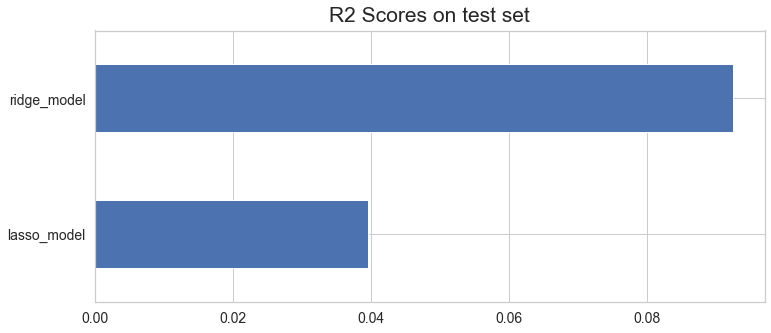

In [254]:
plt.title('R2 Scores on test set', fontsize=21, y=1.01)

ax = all_scores['test_mean_score'].sort_values(ascending=True).plot(kind='barh', 
            figsize=(12,5), 
            fontsize=14)

In [255]:
# The accuracy score very low
# may be choise wrong machine learning algorithms
# I want to do it as classification problem

# 3. Classification

In [256]:
# I want to fix this as classfication problem
# create lable from these salaries

In [291]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesRegressor

from sklearn.model_selection  import train_test_split, GridSearchCV, cross_val_score

from sklearn.metrics import confusion_matrix, recall_score

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib

Using matplotlib backend: MacOSX


In [292]:
# if there haven't label column we can ceate the lable as blow:

#median_salary = df_data['estimated_salary'].median()

#y is a category that the mapping function predicts
#create lables from salary

#df_data['salary_label'] = df_data['estimated_salary'].apply(lambda x: 1 if x > median_salary else 0)

#df_data['salary_label'].value_counts()

In [293]:
# define X and y
#y is a category that the mapping function predicts
# our dataset has 'above_ave_salary' column
# the lable values = df_data['above_ave_salary']

X_sal = df_data[['title','classification', 'location']]
y_sal = df_data['above_ave_salary']

In [294]:
X_sal_dummy = pd.get_dummies(X_sal, drop_first=True)
print (X_sal_dummy.shape)

(885, 782)


## Ensamble Methodes

### Baseline Accuracy

In [295]:
max(df_data['above_ave_salary'].value_counts(normalize=True))*100

53.333333333333336

### Data Preparation

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X_sal_dummy, y_sal, test_size=0.33, random_state=42, stratify = y)


y_test.mean()

In [298]:
y_train.mean()

0.46621621621621623

### Decision Tree Model

In [316]:
dt = DecisionTreeClassifier()

In [317]:
cross_val_score(dt, X_train, y_train, cv=10)

array([0.56666667, 0.66666667, 0.66666667, 0.48333333, 0.63333333,
       0.65      , 0.70689655, 0.79310345, 0.63793103, 0.63793103])

In [318]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [319]:
dt.score(X_train, y_train)

0.9915540540540541

In [320]:
dt.score(X_test, y_test)

0.6621160409556314

In [326]:
dt_predict = dt.predict(X_test)

print(classification_report(y_test, dt_predict))

              precision    recall  f1-score   support

           0       0.69      0.65      0.67       156
           1       0.63      0.67      0.65       137

    accuracy                           0.66       293
   macro avg       0.66      0.66      0.66       293
weighted avg       0.66      0.66      0.66       293



### Bootstrap with Pandas

In [270]:
X_sample = X_train.sample(replace=True, n=X_train.shape[0], random_state=42)
y_sample = y_train[X_sample.index]


In [271]:
bt_tree = DecisionTreeClassifier()
bt_tree.fit(X_sample, y_sample)
bt_tree.score(X_test, y_test)

0.6723549488054608

In [325]:
bt_predict = bt_tree.predict(X_test)
print(classification_report(y_test, bt_predict))

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       156
           1       0.65      0.66      0.65       137

    accuracy                           0.67       293
   macro avg       0.67      0.67      0.67       293
weighted avg       0.67      0.67      0.67       293



### Bagging Classifier

In [313]:
bag = BaggingClassifier(n_estimators=1000)

bag.fit(X_train, y_train)
bag_predict = bag.predict(X_test)
bag.score(X_test, y_test)

0.6757679180887372

In [314]:
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.62      0.79      0.69       156
           1       0.65      0.45      0.53       137

    accuracy                           0.63       293
   macro avg       0.64      0.62      0.61       293
weighted avg       0.64      0.63      0.62       293



### Random ForestClassification

In [310]:
# Run RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

rfc = RandomForestClassifier(random_state=1000)
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
accuracy_score(y_test, rfc_predict)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6313993174061433

In [311]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

           0       0.62      0.79      0.69       156
           1       0.65      0.45      0.53       137

    accuracy                           0.63       293
   macro avg       0.64      0.62      0.61       293
weighted avg       0.64      0.63      0.62       293



### Regression Versus Classification Machine Learning: What’s the Difference?

The difference between regression machine learning algorithms and classification machine learning algorithms sometimes confuse most data scientists, which make them to implement wrong methodologies in solving their prediction problems.

Andreybu, who is from Germany and has more than 5 years of machine learning experience, says that “understanding whether the machine learning task is a regression or classification problem is key for selecting the right algorithm to use.”

Here is a chart that shows the different groupings of machine learning:

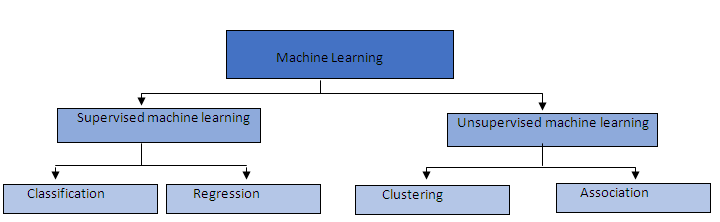

Unfortunately, there is where the similarity between regression versus classification machine learning ends.

The main difference between them is that the output variable in regression is numerical (or continuous) while that for classification is categorical (or discrete).

##### Regression in machine learning
In machine learning, regression algorithms attempt to estimate the mapping function (f) from the input variables (x) to numerical or continuous output variables (y).
In this case, y is a real value, which can be an integer or a floating point value. Therefore, regression prediction problems are usually quantities or sizes.

##### Classification in machine learning
On the other hand, classification algorithms attempt to estimate the mapping function (f) from the input variables (x) to discrete or categorical output variables (y).
In this case, y is a category that the mapping function predicts. If provided with a single or several input variables, a classification model will attempt to predict the value of a single or several conclusions.

REF: Dr.Michael J.Garbade Aug 12,2018
https://medium.com/quick-code/regression-versus-classification-machine-learning-whats-the-difference-345c56dd15f7

# QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:

    .What components of a job posting distinguish data scientists from other data jobs?
    .What features are important for distinguishing junior vs. senior positions?
    .Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?
You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


In [328]:
df_data.head(-10)

,title,job_teaser,advertiser,work_type,classification,location,job_description,estimated_salary,above_ave_salary
0,big data engineer - machine learning,Are you ready to use machine learning in one o...,Morgan McKinley,Full Time,Science & Technology,Sydney,Due to fantastic growth this organisation are ...,55000.0,0
1,ssis/data engineer,Randstad has partnered with an industry leadin...,Randstad Technologies,Full Time,Information & Communication Technology,Melbourne,Randstad has partnered with an industry leadin...,55000.0,0
2,data warehouse engineer - analytics,"A great opportunity to build and have impact, ...",Robert Walters,Full Time,Information & Communication Technology,Sydney,We are currently hiring for a newly created po...,55000.0,0
3,phd scholarship arc training centre in surface...,Swinburne’s ARC Training Centre will be the fi...,Swinburne University of Technology,Full Time,Education & Training,Melbourne,About the CentreSwinburne’s ARC Training Centr...,55000.0,0
9,research laboratory technician,Research Laboratory Technician • Centre for Ex...,Centre for Digestive Diseases,Full Time,Healthcare & Medical,Sydney,Laboratory Technician Outstanding opportunity ...,55000.0,0
...,...,...,...,...,...,...,...,...,...
1344,business improvement manager - logistics,Do you excel in identifying & implementing log...,Private Advertiser,Full Time,Manufacturing,Melbourne,"My client is a leader in Health Services, Cust...",155000.0,1
1346,senior full-stack developer,Create powerful and practical solutions that f...,MCS Consulting,Full Time,Information & Communication Technology,Sydney,Take an opportunity to be part of a growing te...,155000.0,1
1348,principal advisor reliability engineering,Great opportunity to join a global mining orga...,Rio Tinto,Full Time,Mining,Brisbane,Principal Advisor – Reliability Engineering ...,155000.0,1
1349,mid level engineer,I am currently recruiting for a passionate C#/...,Progressive,Full Time,Information & Communication Technology,Sydney,Leading Australian organisation is looking for...,155000.0,1


In [327]:
# try to get junior vs senior positions

df_data['classification'].value_counts()

Information & Communication Technology    481
Science & Technology                       85
Education & Training                       61
Healthcare & Medical                       46
Engineering                                43
Banking & Financial Services               34
Consulting & Strategy                      32
Marketing & Communications                 21
Mining                                     15
Sales                                      11
Accounting                                 11
Government & Defence                       10
Insurance & Superannuation                  9
Manufacturing                               7
Human Resources & Recruitment               6
Community Services & Development            3
CEO & General Management                    2
Farming                                     2
Legal                                       1
Advertising                                 1
Design & Architecture                       1
Construction                      

In [371]:
df_data.title.unique()

array(['big data engineer - machine learning', 'ssis/data engineer',
       'data warehouse engineer - analytics',
       'phd scholarship arc training centre in surface engineering for advanced material',
       'research laboratory technician',
       'start your new career as a data analyst',
       'graduate digital analyst',
       'graduate consultant - it and analytics',
       'research executive - graduate opportunity',
       'environmental data reporting', 'mapping analyst',
       'graduate gis analyst', 'graduate treasury analyst',
       'functional business analyst',
       'graduate electrical engineer (building services)',
       'research data coordinator', 'junior application developer',
       'robson environmental graduate program (science, engineering, whs, construction)',
       'junior data analyst- management consultancy',
       'graduate air quality consultant', 'level 2/3 technical engineer',
       'graduate / junior developer', 'workshop engineer',
       

In [381]:
#senior positions: professional, manager, middle management, senior management,  senior executive
#junior positions: executive, non executive, junior executive, fresh/entry leve

#df_data['data_jobs'] = df_data['classification'].apply(lambda x: 'data_job' if x in(['Information & Communication Technology', 'Science & Technology']) else 'NAN' )
#df_data['data_science'] = df_data['title'].apply(lambda x: 'data scientist' if x in(['data scientist']) else 'NAN')
#df_data['senior_class'] = df_data['title'].apply(lambda x: 'junior' if x in(['graduate', 'junior']) else 'senior')



## NLP (Natural Language Processing)

In [424]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from nltk.stem.snowball import SnowballStemmer

In [425]:
df_high_low = df_data[(df_data.estimated_salary > median_salary) | (df_data.estimated_salary < median_salary)]

In [426]:
X = df_high_low.title
y = df_high_low.above_ave_salary

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)


### Tokeniziation

In [427]:
X.shape

(682,)

In [387]:
# Tokeniziation

In [388]:
X_train.shape

(511,)

In [389]:
y_train.shape

(511,)

In [390]:
X_test.shape

(171,)

In [391]:
vect = CountVectorizer()

In [392]:
tfidf = TfidfVectorizer()

In [393]:
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [394]:
X_train_dtm

<511x504 sparse matrix of type '<class 'numpy.int64'>'
	with 2021 stored elements in Compressed Sparse Row format>

In [395]:
vect.get_feature_names()

['10',
 '150k',
 '160k',
 '170195',
 '173655',
 '1790',
 '180k',
 '20',
 '2020',
 '3d',
 'academy',
 'account',
 'acoustic',
 'actuarial',
 'adelaide',
 'administration',
 'administrator',
 'adtech',
 'advanced',
 'advisor',
 'advocacy',
 'agile',
 'agricultural',
 'ai',
 'aia',
 'aide',
 'air',
 'alzheimer',
 'analsyt',
 'analysis',
 'analyst',
 'analysts',
 'analytics',
 'and',
 'angular',
 'application',
 'applied',
 'apps',
 'arc',
 'architect',
 'architecture',
 'are',
 'artificial',
 'as',
 'assessment',
 'asset',
 'assets',
 'assistant',
 'associate',
 'astro',
 'auexp',
 'australia',
 'australian',
 'automated',
 'automation',
 'available',
 'avamar',
 'avp',
 'aws',
 'azure',
 'back',
 'background',
 'bank',
 'banking',
 'base',
 'based',
 'bcba',
 'behaviour',
 'benign',
 'beverages',
 'bi',
 'big',
 'bioinformatics',
 'biostatistician',
 'blastlogic',
 'blockchain',
 'bo',
 'bonus',
 'brand',
 'brisbane',
 'broken',
 'building',
 'bureau',
 'business',
 'bw',
 'cad',
 'canbe

### Stopwords

In [399]:
# check out the stop words list
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

stop = stopwords.words('english')

# append new stop words
add_stop = ['requirements','qualification', 'qualifications', 'least', 'year', 'years', 
            'experiences','experience', 'end', 'relevant qualification', 'qualification least', 
            'least years','candidate','must']

for word in add_stop:
    stop.append(word)
    
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [401]:
c_vect = CountVectorizer(stop_words=stop, ngram_range=(1,3))
# Fit our vectorizer using our train data
X = c_vect.fit(X_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['relevant'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [402]:
c_vect.vocabulary_

{'cad': 333,
 'software': 1978,
 'engineer': 778,
 'cad software': 334,
 'software engineer': 1984,
 'cad software engineer': 335,
 'aws': 240,
 'data': 528,
 'brisbane': 294,
 'aws data': 243,
 'data engineer': 563,
 'engineer brisbane': 790,
 'aws data engineer': 244,
 'data engineer brisbane': 568,
 'intermediate': 1155,
 'developers': 708,
 'intermediate developers': 1156,
 'senior': 1837,
 'survey': 2072,
 'administration': 36,
 'analyst': 80,
 'senior survey': 1941,
 'survey administration': 2073,
 'administration analyst': 37,
 'senior survey administration': 1942,
 'survey administration analyst': 2074,
 'tech': 2104,
 'lead': 1232,
 'engineering': 847,
 'tech lead': 2107,
 'lead data': 1240,
 'data engineering': 582,
 'tech lead data': 2108,
 'lead data engineering': 1242,
 'python': 1620,
 'spark': 2012,
 'redshift': 1671,
 'engineer python': 833,
 'python spark': 1629,
 'spark aws': 2013,
 'aws redshift': 247,
 'data engineer python': 578,
 'engineer python spark': 834,
 'py

In [403]:
# Transforming our x_train data using our fit cvec.
# And converting the result to a DataFrame.
X_train_df = pd.DataFrame(c_vect.transform(X_train).todense(),
                       columns=cvec.get_feature_names())

In [404]:
X_train_df.shape

(511, 2233)

In [405]:
# Which words appear the most?

word_counts = X_train_df.sum(axis=0)
word_counts.sort_values(ascending = False).head(20)

data                 219
engineer             148
senior               100
analyst               78
data engineer         67
research              54
consultant            51
scientist             51
developer             49
analytics             39
software              34
data scientist        34
manager               32
business              31
lead                  28
data analyst          23
software engineer     21
data analytics        20
senior data           19
graduate              18
dtype: int64

In [406]:
X_test_df = pd.DataFrame(c_vect.transform(X_test).todense(), columns=c_vect.get_feature_names())

In [408]:
X_train_df.shape

(511, 2233)

In [410]:
y_train.shape

(511,)

In [411]:
X_test_df.shape

(171, 2233)

In [412]:
y_test.shape

(171,)

#### Logistic regression and test

In [413]:
#Import and fit our logistic regression and test it
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_df, y_train)
lr.score(X_test_df, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7953216374269005

In [414]:

coefs_vars = pd.DataFrame({'coef':lr.coef_[0], 
                           'variable':X_train_df.columns, 
                           'abscoef':np.abs(lr.coef_[0])
                          })

coefs_vars.sort_values('abscoef', ascending=False, inplace=True)

coefs_vars[coefs_vars['abscoef'] > 0]


,coef,variable,abscoef
1837,1.662259,senior,1.662259
1189,-1.633173,junior,1.633173
1030,-1.568186,graduate,1.568186
1688,-1.435389,research,1.435389
528,1.373380,data,1.373380
...,...,...,...
1525,0.007216,pipeline,0.007216
1526,0.007216,pipeline focus,0.007216
403,0.007216,cloud platform data,0.007216
1005,0.001878,gis,0.001878


#### TfidfVectorizer

In [415]:
# Preprocess our text data to Tfidf
tfv = TfidfVectorizer(ngram_range=(1,3),stop_words=stop, max_features=3000)
X = tfv.fit_transform(X_train).todense()
X.shape

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['relevant'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(511, 2233)

In [416]:
# cross-validate the accuracy:

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(LogisticRegression(solver='lbfgs'), X, y_train, cv=10)
import numpy as np
print(accuracies)
print(np.mean(accuracies))

[0.65384615 0.71153846 0.75       0.75       0.68627451 0.74509804
 0.7254902  0.76       0.72       0.8       ]
0.7302247360482654
